# Homework 2: Backpropagation

## Author: Aaron Beyen (GU student)

### Packages

In [1]:
# Calculations
import numpy as np 
import random
from scipy.special import erf 
import itertools

# Plotting
import matplotlib.pyplot as plt # plot graphs
from matplotlib.colors import ListedColormap # plot digits
import pandas as pd


# Nice output display
import sympy as sp
from IPython.display import display
sp.init_printing()
%matplotlib notebook

# 1) One-layer percepton

## Parameters

In [253]:
training = pd.read_csv (r'C:\Users\beyen\Documents\KUL\Master\jaar 2\Eerste Semester\Neural Networks\training_set.csv', header = None)
validation = pd.read_csv (r'C:\Users\beyen\Documents\KUL\Master\jaar 2\Eerste Semester\Neural Networks\validation_set.csv', header = None)

m1 = [3]
pval = len(validation)

eta = 0.0001*2

print(validation)

            0        1  2
0    -0.29322 -0.92457 -1
1    -0.62355 -0.75314 -1
2     0.53821  0.32608 -1
3     0.29471 -0.58012 -1
4    -0.58145  0.63680 -1
...       ...      ... ..
4995 -0.86655 -0.30235 -1
4996  0.52648 -0.14168 -1
4997  0.93888 -0.16411 -1
4998 -0.90486  0.30053 -1
4999  0.84463 -0.17899  1

[5000 rows x 3 columns]


## Functions

In [251]:
def normalise(x):
    return (x-np.mean(x))/np.std(x)

def sgn(x):
    return np.sign(x)+(x == 0)

def activation(x):
    return np.tanh(x)

def classification_error(o,t):
    return 1/(2*pval)*np.sum(abs(sgn(o)-t))-1/(2*pval)*np.end(abs(sgn(o)-t))

def dg(x):
    return 1/np.cosh(x)**2

def b_field(x,m, w,theta):
    z = np.einsum('jk, ik->ji', w,x)
    for i in range(len(theta)):
        z[i]-theta[i]
    return z

def B_field(x,m, w,theta):
    B = np.einsum('j,ji->i', w, x)-theta
    return B

def energy(f,x):
    return 1/2*np.sum((f-x)**2)
    

def back(f,x,n,x_val,t_val): # test if the given n-dimensional function is linear seperable
    w1 = np.array([np.random.normal(0, 1/len(x[0]), len(x[0])) for i in range(n)]) # initialise the weights from a normal distribution with mean zero and variance 1/n
    w2 = np.random.normal(0,1/n, n)
    theta1 = np.array([0 for i in range(n)]) # initialise the threshold with 0 value
    theta2 = 0
    
    v_val = activation(b_field(x_val,n,w1,theta1))    
    o_val = activation(B_field(v_val,n,w2,theta2))
    
    #print(v_val)
    
    E = classification_error(o_val,t_val)
    
    #print(E)
    
    count = 0

    while E>= 0.12:
        b = b_field(x,n,w1,theta1)
        v = activation(b_field(x,n,w1,theta1))
        B = B_field(v,n,w2,theta2)
        o = activation(B_field(v,n,w2,theta2))
        
        #print(o)
        
        Delta = (f-o)*dg(B)
        
        #print(Delta)
        
        #print(o)
        
        #print(f-o)
        
        delta = []
        
        for i in range(n):
            delta.append(dg(b[i])*w2[i]*Delta[i])
                #delta = Delta*dg(b)*w2
        #print(delta)
        w2 += eta*np.einsum('j,ij->i', Delta, v)
        #print(w2)
        dw1 = []
        
        for i in range(len(delta)):
            row = []
            for j in range(len(np.transpose(x))):
                row.append(eta*np.dot(delta[i], np.transpose(x)[j]))
            dw1.append(row)
        #print(dw1)
        w1 += dw1
        
        dtheta1 = []
        
        for i in range(len(delta)):
            dtheta1.append(-eta*np.sum(delta[i]))
        theta1 = theta1+ dtheta1
        #print(theta1)
        #print(dtheta1)
        theta2 += -eta*np.sum(Delta)
        
        #print(theta2)
        
        v_val = activation(b_field(x_val,n,w1,theta1))    
        o_val = activation(B_field(v_val,n,w2,theta2))
        
        #print(B_field(v_val,n,w2,theta2))
        
        #print(v_val)
        #print(o_val)
                   
        E = classification_error(o_val,t_val)
        
        #print(o_val-t_val)
        
        count = count + 1
        
        if count == 1000:
            print(o_val-t_val)
            print(E)
            break
            
    return [w1,w2,theta1,theta2]

In [252]:
back(t,x,m1[0],x_val,t_val)

AttributeError: module 'numpy' has no attribute 'end'

In [114]:
training_n = normalise(training)
validation_n = normalise(validation)

x1 = np.array(training_n[0])
x2 = np.array(training_n[1])
t = np.array(training[2])

x_val1 = np.array(validation_n[0])
x_val2 = np.array(validation_n[1])
t_val = np.array(validation[2])


x = []
x_val = []

for i in range(len(x1)):
    x.append([x1[i], x2[i]])
    
for i in range(len(x_val1)):
    x_val.append([x_val1[i], x_val2[i]])

# 2) Boltzmann machine

In [2]:
M = [1,2,4,8]
k = 100
eta = 0.1
p0 = 2
x = [[-1,-1,-1], [1,-1,1], [-1,1,1], [1,1,-1]]

neuron = [1,-1]

nu_max = 5
N = 3

In [3]:
def activation(x):
    return np.tanh(x)

def b_field(x,m, w,theta):
    z = np.dot(w,x)-theta #np.einsum('ij, j->i', w,x)
    return z
def prob(x):
    return 1/(1+np.exp(-2*x))

def cd(x,n,k):
    w = np.array([np.random.normal(0, 1/len(x[0]), len(x[0])) for i in range(n)]) # initialise the weights from a normal distribution with mean zero and variance 1/n
    theta_h = np.array([0 for i in range(n)]) # initialise the threshold with 0 value
    theta_v = np.array([0 for i in range(N)])
    freq = []
    for nu in range(1, nu_max+1):
        patterns = [x[np.random.choice([0,1,2,3])] for i in range(p0)]
        
        for mu in range(0,p0):
            v = patterns[mu]
            V = [v]
            b_h = b_field(v, n,w,theta_h)
            Bh = [b_h]
            h = [np.random.choice(neuron, p = [prob(b_h[i]), 1-prob(b_h[i])]) for i in range(n)]
            H = [h]
            for t in range(1,k+1):
                b_v = np.dot(H[t-1], w)-theta_v
                V.append([np.random.choice(neuron, p = [prob(b_v[j]), 1-prob(b_v[j])]) for j in range(0,N)])
                Bh.append(np.dot(w,V[t])-theta_h)
                H.append([np.random.choice(neuron, p = [prob(Bh[t][j]), 1-prob(Bh[t][j])]) for j in range(0,n)])
            dw = []
            #eta*[np.tanh(b_h[0])*v[0]-np.tanh(Bh[k-1][0])*V[k-1][0]]
            for i in range(n):
                row = []
                for j in range(N):
                    row.append(eta*(np.tanh(b_h[i])*v[j]-np.tanh(Bh[k-1][i])*V[k-1][j]))
                dw.append(row)
            
            dtheta_v = [-eta*(v[j]-V[k-1][j]) for j in range(N)]
            dtheta_h = [-eta*(np.tanh(b_h[j])-np.tanh(Bh[k-1][j])) for j in range(n)]
        w += dw
        theta_v = theta_v+ dtheta_v
        theta_h = theta_h+ dtheta_h
        freq.append(V[k])
    return freq

def divergence(p_data,p):
    return np.sum(p_data*np.log(p_data/p))

def dkl(x):
    if x < 2**(N-1)-1:
        return N-int(np.log2(x+1))-(x+1)/(2**(int(np.log2(x+1))))
    else:
        return 0
            

In [4]:
D = []
uniform = [1/4,1/4,1/4,1/4]
for j in range(len(M)):
    pb = np.array([0,0,0,0])
    train = 100
    for i in range(train):
        freq = cd(x,M[j],k)
        pb += np.array([freq.count(x[i]) for i in range(len(x))])
        print(i)
    pb = pb/train
    pb = pb/np.sum(pb)
    D.append(divergence(uniform,pb))
D

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

<IPython.core.display.Javascript object>


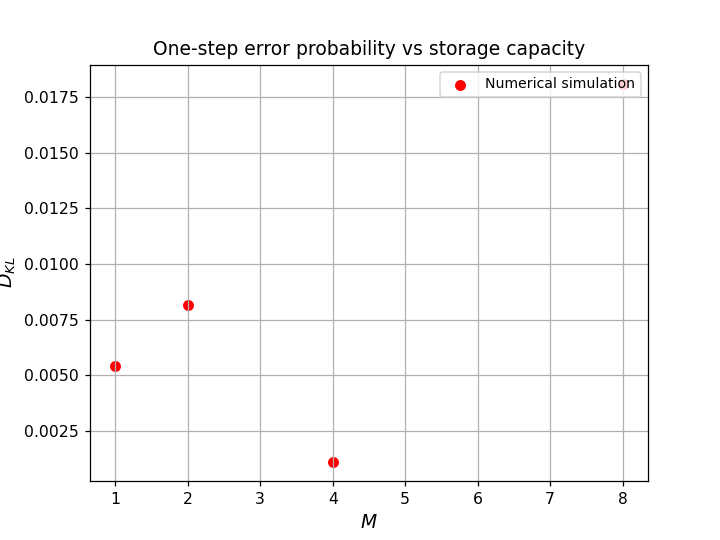

In [5]:
M_c = np.linspace(0, M[-1], 100) # M list to plot analytical result
analytical = [dkl(M_c[i]) for i in range(len(M_c))]

fig, ax = plt.subplots(1,1)


plt.scatter(M,D, label = r'Numerical simulation', color = 'red') # we only plot points (scatter) for the 
                                                                                    # numerical simulations (no full lines)
#plt.plot(M_c, analytical, label = 'Analytical result')

plt.title(r'One-step error probability vs storage capacity')
plt.xlabel(r'$M$', fontsize = 12)
plt.ylabel('$D_{KL}$', fontsize = 12)

plt.grid()
plt.legend(loc = 'upper right', fontsize = 9)

plt.show()